In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'], utc=True)
data['Date']=data['Formatted Date'].map(lambda date: date.year*10000 + date.month*100 + date.day)
data['DayOfYear'] = data['Formatted Date'].dt.dayofyear
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,DayOfYear
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,20060331,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,20060331,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,20060401,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,20060401,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,20060401,91


In [11]:
AvgDayTem = data.groupby(['DayOfYear', 'Date'])['Temperature (C)'].mean().reset_index()
AvgDayTem

,DayOfYear,Date,Temperature (C)
0,1,20060101,4.075000
1,1,20070101,3.806713
2,1,20080101,-5.663194
3,1,20090101,-4.850926
4,1,20100101,7.807407
...,...,...,...
4014,365,20151231,-4.304861
4015,365,20161230,0.117593
4016,366,20081231,-6.218056
4017,366,20121231,-3.249306


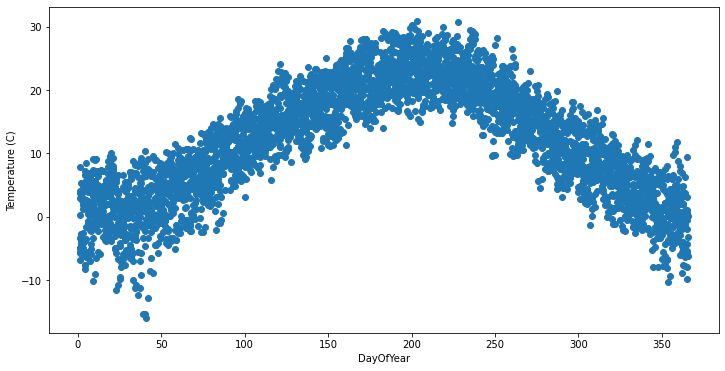

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(AvgDayTem['DayOfYear'], AvgDayTem['Temperature (C)'])
plt.xlabel('DayOfYear')
plt.ylabel('Temperature (C)')
plt.show()

In [17]:
X = AvgDayTem['DayOfYear'].values
Y = AvgDayTem['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [46]:
X_train, X_test , Y_train , Y_test = train_test_split(X ,Y ,shuffle=True)

In [47]:
class Perceptron:
    def __init__(self, lr=0.05, epochs=1):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X_train, Y_train):
        self.w = np.random.rand(1, 1)
        self.b = np.random.rand(1, 1)
        self.lr_b = 0.0001
        
        self.Errors = []
        self.W_list = []
        self.B_list = []
        
        for self.epochs in range(self.epochs):
            for i in range(X_train.shape[0]):
                y_pred = np.matmul(X_train[i], self.w) + self.b
                e = Y_train[i] - y_pred
                
                #update
                self.w += self.lr * e * X_train[i]
                self.b += self.lr_b * e
                
                Y_pred = np.matmul(X_train, self.w)
                error = np.mean(np.abs(Y_train - Y_pred))
                
                self.Errors.append(error)
                self.W_list.append(self.w)
                self.B_list.append(self.b)

            np.save('hyperParameters.npy', self.W_list, self.B_list)

    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        return Y_pred
    
    def evaluate(self, X, Y):
        Y_pred = np.matmul(X, self.w) + self.b
        Error = np.abs(Y - Y_pred)
        MSE = np.mean(Error**2)
        return MSE
    
    def get_loss(self):
        return self.Errors

In [48]:
percep = Perceptron(epochs=2, lr=0.0000001)
percep.fit(X_train, Y_train)

Y_pred = percep.predict(X)
mse = percep.evaluate(X_test, Y_test)
mse

99.71335999148035

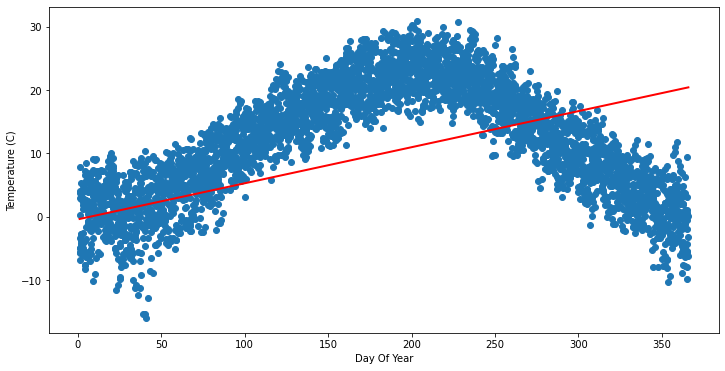

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', lw=2)
plt.xlabel('Day Of Year')
plt.ylabel('Temperature (C)')
plt.show()

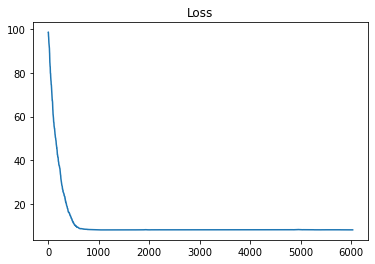

In [50]:
loss = percep.get_loss()
plt.plot(loss)
plt.title('Loss')
plt.show()

In [51]:
np.load("hyperParameters.npy")

array([[[0.05687949]],

       [[0.05687949]],

       [[0.05687949]],

       ...,

       [[0.05687949]],

       [[0.05687949]],

       [[0.05687949]]])